<a href="https://colab.research.google.com/github/kangnurrohman/word-vector/blob/main/src/Part%201%20-%20Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install luwiji umap-learn

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/data/data 6.zip", 'r')
zip_ref.extractall("data")
zip_ref.close()

In [8]:
import os

import pandas as pd
from tqdm.auto import tqdm

import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from luwiji.word_vector import illustration

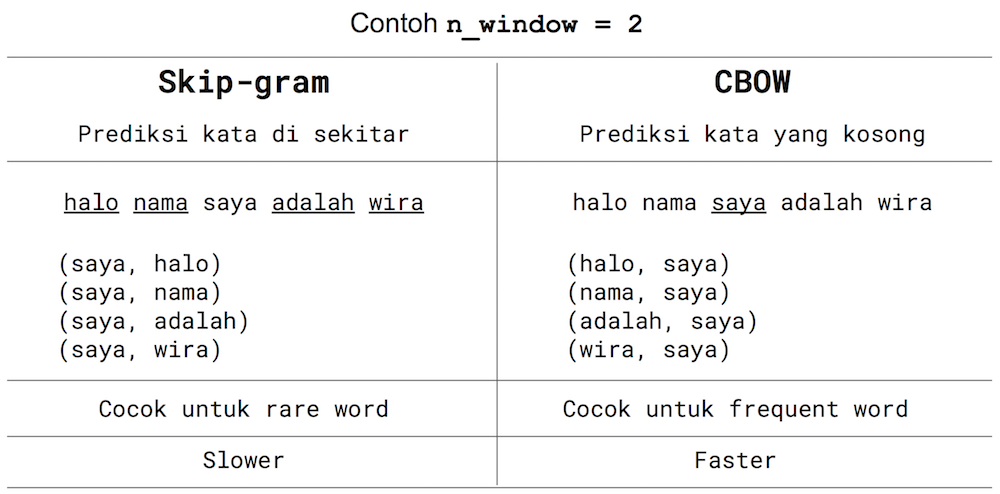

In [10]:
illustration.cbow_vs_skipgram

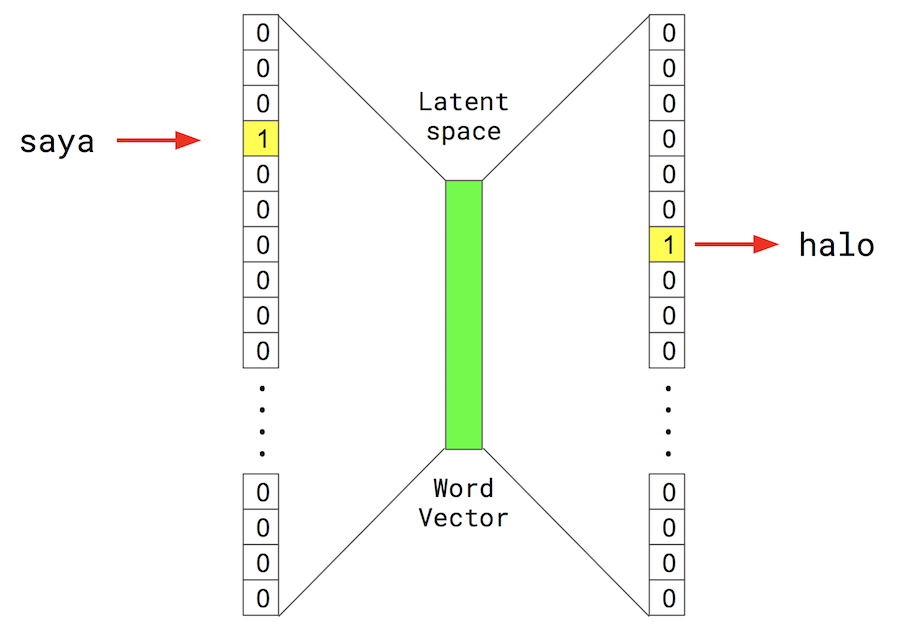

In [11]:
illustration.word2vec

## Prepare Corpus

In [12]:
df = pd.read_csv("data/gojek_review.csv")
df.head()

,review,rate
0,Sangat kecewa. Kecewa sekali. Udh top up. Mau ...,1
1,Ga niat ngasih promo sialan temen udh pake ref...,1
2,Kalau sistemnya rata begini apa bedanya yg raj...,1
3,"Ongkosnya da mahal, minimal 16rb..... Sekarang...",1
4,Tolol anjing..!!!! Aplikasi yang katanga karya...,1


In [13]:
sentences = [word_tokenize(review.lower()) for review in tqdm(df.review)]
sentences[:5]

  0%|          | 0/1277 [00:00<?, ?it/s]

[['sangat',
  'kecewa',
  '.',
  'kecewa',
  'sekali',
  '.',
  'udh',
  'top',
  'up',
  '.',
  'mau',
  'di',
  'transaksi',
  'in',
  'malah',
  'kasih',
  'nomor',
  'yang',
  'salah',
  '.',
  'padahal',
  'nomor',
  'di',
  'profil',
  'benar',
  '.',
  'buat',
  'ap',
  'ah',
  'q',
  'top',
  'up',
  'tp',
  'ga',
  'bisa',
  'digunain',
  '.',
  'balikin.',
  '!',
  'ga',
  'becus',
  '.',
  'kasih',
  'nomer',
  'saalah',
  '.',
  'saya',
  'mau',
  'masukin',
  'kode',
  'transaksi',
  'gimana.',
  '!',
  '!',
  '!',
  '!'],
 ['ga',
  'niat',
  'ngasih',
  'promo',
  'sialan',
  'temen',
  'udh',
  'pake',
  'reff',
  'ga',
  'pake',
  'cara',
  'curang',
  'malah',
  'di',
  'stop',
  '.',
  'kapitalis',
  '.',
  'daerah',
  'ku',
  'ongkir',
  'ga',
  'ada',
  'subsidi',
  'di',
  'daerah',
  'lain',
  'masih',
  'ada',
  '.',
  'ampas',
  'gojek',
  'skrng',
  '.',
  'strategi',
  'baru',
  'ga',
  'bakar',
  'duit',
  'gimana',
  '.',
  'yg',
  'ada',
  'transaksi',
  'h

## Train Word2Vec Model

In [14]:
model = Word2Vec(sentences, size=128, window=5, min_count=3, workers=2, iter=1000, sg=0, hs=0)

## Save

In [15]:
os.makedirs("data/model/w2v/", exist_ok=True)
model.save("data/model/w2v/gojek_review.w2v")

## Load

In [16]:
model = Word2Vec.load("/content/data/model/w2v/gojek_review.w2v")

## Continue training

In [17]:
contoh_data = [
    ['aplikasinya', 'oke', 'kok', 'sangat', 'membantu', 'untuk', 'keseharian', 'saya'],
    ['aplikasinya', 'gak', 'nyaman', 'dipakai', 'bule']
]

In [18]:
model.train(contoh_data, total_examples=len(contoh_data), epochs=1)

(9, 13)

In [19]:
model = Word2Vec.load("/content/data/model/w2v/gojek_review.w2v")

## Model Information

In [29]:
w2v = model.wv

In [21]:
w2v.index2word

[',',
 '.',
 'saya',
 '!',
 'di',
 'gojek',
 '..',
 'yg',
 'bisa',
 '?',
 'ada',
 'nya',
 'driver',
 'dan',
 'ini',
 'aplikasi',
 'tidak',
 'yang',
 'gak',
 'mau',
 'ga',
 'lagi',
 '...',
 'tolong',
 'aja',
 'sudah',
 'tapi',
 'untuk',
 'voucher',
 'padahal',
 'gopay',
 'ke',
 'sama',
 'udah',
 'order',
 'lebih',
 'sangat',
 'akun',
 'dengan',
 'ya',
 'buat',
 'sekarang',
 'kenapa',
 'jadi',
 'kasih',
 'malah',
 'lama',
 'dari',
 'gofood',
 'itu',
 'promo',
 'kalo',
 'jauh',
 'juga',
 'dapat',
 'pake',
 'karena',
 'masuk',
 'banyak',
 'terus',
 'kalau',
 'apa',
 'baru',
 'dong',
 'go',
 'kok',
 'gk',
 'kecewa',
 'pakai',
 'harus',
 'selalu',
 'orderan',
 'pesan',
 'sistem',
 'hari',
 'cuma',
 'makin',
 'tp',
 "''",
 'saldo',
 'banget',
 'dulu',
 'atau',
 'anak',
 'beli',
 'sekali',
 'mohon',
 'sampai',
 'makanan',
 'mahal',
 'sering',
 'setiap',
 'grab',
 'masih',
 'pas',
 'baik',
 'jangan',
 'klo',
 'saja',
 'drivernya',
 '1',
 'update',
 'kali',
 'sy',
 'membantu',
 'perbaiki',
 'dap

In [22]:
w2v.vectors

array([[-0.57524604,  1.048696  , -1.1789343 , ...,  0.16913487,
         0.09978686,  1.9158143 ],
       [ 0.17270939,  0.80876935, -0.9125577 , ...,  0.8949972 ,
         0.9168742 ,  1.2272209 ],
       [ 0.6182008 , -0.01254731, -0.02113076, ...,  0.3177538 ,
        -0.83010954, -1.2328675 ],
       ...,
       [-5.2666135 ,  1.7079084 ,  1.1563978 , ..., -0.98593926,
        -0.8464478 , -0.5246284 ],
       [-0.7954074 , -0.7427003 , -2.835749  , ..., -0.17827453,
        -1.3395756 , -1.3625709 ],
       [-0.10422025,  0.64057297,  1.8292184 , ..., -0.13740511,
         1.4259412 , -1.4658448 ]], dtype=float32)

In [23]:
w2v.vector_size

128

In [24]:
w2v["ojol"]

array([ 0.05581323, -1.5721871 , -1.306006  ,  4.064484  , -3.6388905 ,
        2.3297315 ,  0.16008677,  2.9992397 ,  5.2908897 , -0.302917  ,
       -1.1799369 , -1.571242  , -0.605343  , -0.31083462,  3.6386077 ,
       -1.5554931 , -3.0919478 ,  4.441986  ,  1.2552644 ,  1.0668042 ,
       -3.7531495 ,  0.5324948 , -1.2854077 ,  2.0452292 ,  3.615814  ,
       -0.71715546,  1.4827557 ,  2.513075  , -0.09649669,  2.5866106 ,
        0.83265465,  0.12193061, -1.7067407 , -1.652096  ,  1.2953981 ,
        3.1244853 ,  3.47431   , -1.2501988 , -4.1642857 ,  1.4421023 ,
        1.3305632 ,  1.0628091 ,  4.4653215 , -3.700048  ,  1.3917934 ,
       -0.5034438 ,  1.3870666 , -1.4264588 ,  1.8419789 ,  1.3119678 ,
       -0.8271395 , -0.97270447,  4.266026  ,  4.6354055 ,  2.6705399 ,
       -4.311021  , -2.1640558 , -1.6811986 ,  1.5816869 ,  2.5336163 ,
        3.0969481 ,  1.1161106 ,  0.05224735,  1.7869842 ,  3.0944414 ,
        0.6220289 , -2.6134691 ,  0.50005406,  1.1178209 ,  0.22

## Sanity check

### Similar word

In [25]:
w2v.similar_by_word("gojek", topn=5)

[('ini', 0.35383176803588867),
 ('.', 0.33429208397865295),
 ('go-jek', 0.3197135925292969),
 ('saya', 0.3094565272331238),
 ('..', 0.29019826650619507)]

### higher order visualization

In [26]:
from umap import UMAP
import numpy as np
import pandas as pd
import plotly.express as px

In [27]:
X = UMAP().fit_transform(w2v.vectors)

In [31]:
df = pd.DataFrame(X, columns=["umap1", "umap2"])
df["text"] = w2v.index2word

In [32]:
fig = px.scatter(df, x="umap1", y="umap2", text="text")
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='Reduced Word2Vec Visualization'
)
fig.show()